In [66]:
from typing import Iterator
from matplotlib import pyplot as plt
import math as mt 
import numpy as np
from random import random
from random import uniform
%matplotlib inline

# Derive the value of $\pi$ numerically

# Leibniz series

The value of the pi constant can be derived numerically in many ways. One of the easiest way is given from the **Leibniz series** 


$$ \pi = 4 \sum_{n=0}^{\infty}  \frac{-1^n}{2n+1} $$

In [67]:
pi = mt.pi 

# let's compute pi with positive integers up to N where N ranges from 10 to 1000
initial = 10
final = 5000
max_value = np.linspace(initial, final, final-initial, dtype=int)

pi_estimates_l = []

for mv in max_value:
    pi_estimates_l.append( 4* sum([mt.pow(-1,i) / (2*i+1) for i in range(0, mv)]) )

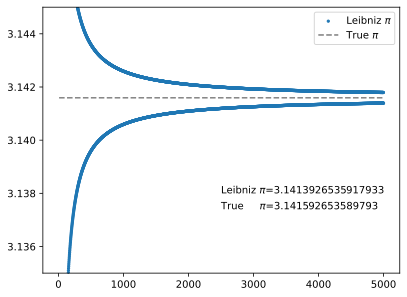

In [68]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(max_value, pi_estimates_l, label=r"Leibniz $\pi$", s=5)
ax.hlines(pi, min(max_value), max(max_value), color="grey", linestyles="--", label=r"True $\pi$")
ax.legend(loc="best")
ax.set_ylim(3.135, 3.145)
ax.text(final / 2, 3.138, fr'Leibniz $\pi$={pi_estimates_l[-1]}')
ax.text(final / 2, 3.1374, fr'True     $\pi$={pi}')
plt.show()

# Monte Carlo method 

While the Leibniz series converge to the true value of the $\pi$ constant very fast with the number of iterations it does so kind of slow with respect to time. Monte Carlo methods can be very efficient in these situations. The idea is that the $\pi$ constant is related to the area of the unit circle 

$$ A(r) = \int_{0}^{r} 2\pi r \cdot dr \quad \rightarrow (r=1) \rightarrow \quad A = \int_{0}^{1} 2\pi r = |\pi r^2|_{0}^{1} = \pi $$ 

We can compute the area $A$ with monte carlo then $\pi = A$

In [69]:
experiments = np.linspace(initial, final, final-initial, dtype=int)
#volume of the unit square where we are throwing points 
square_area = 2**2
pi_estimates_m = []

for n in experiments:
    n__ = 2*n
    # then compute the rand
    rand_sequence = np.array([uniform(-1.0, 1.0) for _ in range(int(n__))]).reshape(-1, 2)
    catch = np.array([i for i in rand_sequence if mt.pow(i[0],2) + mt.pow(i[1],2) <= 1])
    pi_estimates_m.append(float(len(catch)) / (n) * square_area)

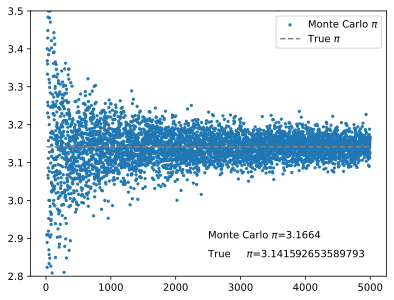

In [70]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(experiments, pi_estimates_m, label=r"Monte Carlo $\pi$", s=5)
ax.hlines(pi, min(experiments), max(experiments), color="grey", linestyles="--", label=r"True $\pi$")
ax.legend(loc="best")
ax.set_ylim(2.8, 3.5)
ax.text(final / 2, 2.9, fr'Monte Carlo $\pi$={pi_estimates_m[-1]}')
ax.text(final / 2, 2.85, fr'True     $\pi$={pi}')
plt.show()

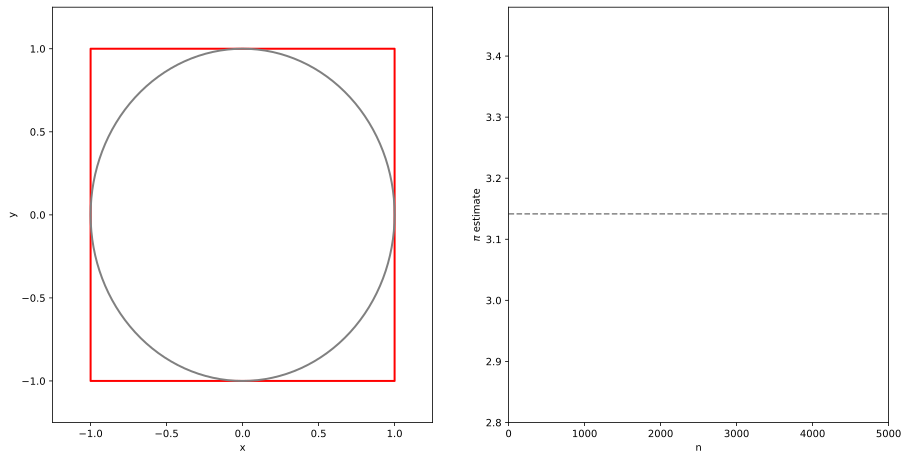

In [76]:
import matplotlib.patches as patches
import matplotlib.animation as animation

ndraws = 5000

fig, ax = plt.subplots(1,2, figsize=(15,7.5))

rect = patches.Rectangle((-1,-1), 2, 2, linewidth=1, edgecolor='r', facecolor='none')
circle = patches.Circle((0,0), 1, linewidth=1, edgecolor='grey', facecolor='none')

# Add the patch to the Axes
ax[0].add_patch(rect)
ax[0].add_patch(circle)


scat = ax[0].scatter(-100, 100, c="b", s=5)
scat2 = ax[1].scatter(-100, 100, c="b", s=5)

ax[0].set(xlim=[-1.25, 1.25], ylim=[-1.25, 1.25], xlabel='x', ylabel='y')
ax[1].set(xlim=[0, ndraws], ylim=[2.8, 3.48], xlabel='n', ylabel=r'$\pi$ estimate')

ax[1].hlines(mt.pi,0, ndraws, color="grey", linestyles="--", label=r"True $\pi$")

# ax[0].legend()


rse = np.array([uniform(-1.0, 1.0) for _ in range(int(ndraws*2))]).reshape(-1, 2)
pi_gif_est = []
square_area = 2**2


for idx in range(len(rse)):
    seq = rse[:idx]
    catch = np.array([i for i in seq if mt.pow(i[0],2) + mt.pow(i[1],2) <= 1])
    pi_gif_est.append(float(len(catch)) / (idx+1) * square_area)
    
    

def update(frame):
    # for each frame, update the data stored on each artist.

    # first axis
    rs = rse[:frame*50]

    # second axis
    y = pi_gif_est[:frame*50]
    x = [i for i in range(frame*50)]
    data = np.stack([x, y]).T
    
    # update the scatter plot:
    scat.set_offsets(rs)
    scat2.set_offsets(data)
    return (scat,scat2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=int(ndraws/50), interval=1)
ani.save(filename="GIFs/mc_area.gif", writer="pillow", fps=500)

# Comparing convergences of the two algorithms

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(experiments, pi_estimates_m, label=r"Monte Carlo $\pi$", s=5)
ax.scatter(max_value, pi_estimates_l, label=r"Leibniz $\pi$", s=5, c="red")
ax.hlines(pi, min(experiments), max(experiments), color="orange", linestyles="--", label=r"True $\pi$")
ax.legend(loc="best")
ax.set_ylim(2.8, 3.5)
ax.text(final / 2, 2.95, fr'Monte Carlo $\pi$={pi_estimates_m[-1]}')
ax.text(final / 2, 2.9, fr'Leibniz $\pi$={pi_estimates_l[-1]}')
ax.text(final / 2, 2.85, fr'True     $\pi$={pi}')
plt.show()